# **An EDA & DPL Combined project:**
# > Unlocking the Skies: Harnessing Machine Learning to Predict and Prevent Airline Delays for Smoother Travel
By Aditi Dhavale, Anshul Shinde & Ananya Sachan




In this notebook, we have preprocessed the flight data from 2019 and performed Exploratory Data analysis on it to find suitable variables for further Airline delay prediction. Hence, this notebook is divided into 3 parts:
1. Data preprocessing
2. EDA
3. Airline delay prediction & related stats

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.tseries.offsets import Hour, Minute
import seaborn as sns

Only considering important columns as dataset is huge.

In [62]:
# Reading all the info we need from airline-delays-analysis
usecols=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME','ARR_DELAY','DISTANCE', 'FL_DATE']
airlines = pd.read_csv('/content/sample_data/2019.csv', usecols=usecols)
airlines['dt'] = pd.to_datetime(airlines['FL_DATE'])
airlines['WDAY'] = airlines['dt'].dt.dayofweek   #  day_name()
airlines['DAY'] = airlines['dt'].dt.day
airlines['MONTH'] = airlines['dt'].dt.month
airlines['YEAR'] = airlines['dt'].dt.year

In [59]:
airlines.drop(['dt'], axis=1)

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,1,1,1,2019
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,1,1,1,2019
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,1,1,1,2019
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,1,1,1,2019
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084826,2019-09-07,OO,DTW,MQT,817.0,-3.0,942.0,-8.0,349.0,5,7,9,2019
5084827,2019-09-07,OO,MQT,DTW,1020.0,0.0,1128.0,-10.0,349.0,5,7,9,2019
5084828,2019-09-07,OO,PIH,SLC,1213.0,-6.0,1258.0,-17.0,150.0,5,7,9,2019
5084829,2019-09-07,OO,SLC,PIH,1048.0,-2.0,1130.0,-24.0,150.0,5,7,9,2019


In [61]:
airlines.tail()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,FINAL_DELAY
5084826,2019-09-07,OO,DTW,MQT,817.0,-3.0,942.0,-8.0,349.0,2019-09-07,5,7,9,2019,-11.0
5084827,2019-09-07,OO,MQT,DTW,1020.0,0.0,1128.0,-10.0,349.0,2019-09-07,5,7,9,2019,-10.0
5084828,2019-09-07,OO,PIH,SLC,1213.0,-6.0,1258.0,-17.0,150.0,2019-09-07,5,7,9,2019,-23.0
5084829,2019-09-07,OO,SLC,PIH,1048.0,-2.0,1130.0,-24.0,150.0,2019-09-07,5,7,9,2019,-26.0
5084830,2019-09-07,OO,DTW,SCE,835.0,-5.0,NaN,NaN,NaN,2019-09-07,5,7,9,2019,NaN


Only considering 3 months of data due to dataset being too huge to load properly on colab.

In [63]:
start_date = '2019-01-01'
end_date = '2019-03-31'

airlines = airlines[(airlines['FL_DATE'] >= start_date) & (airlines['FL_DATE'] <= end_date)]

calculating final delay

In [64]:
airlines['FINAL_DELAY'] = airlines['DEP_DELAY'] +  airlines['ARR_DELAY']
airlines

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,FINAL_DELAY
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019,0.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019,-41.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019,-21.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019,-20.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749229,2019-03-31,AS,SFO,SAN,1903.0,33.0,2024.0,24.0,447.0,2019-03-31,6,31,3,2019,57.0
1749230,2019-03-31,AS,SAN,SFO,1738.0,-2.0,1904.0,-11.0,447.0,2019-03-31,6,31,3,2019,-13.0
1749231,2019-03-31,AS,SFO,SAN,2135.0,-5.0,2304.0,-6.0,447.0,2019-03-31,6,31,3,2019,-11.0
1749232,2019-03-31,AS,SAN,SFO,2113.0,23.0,2250.0,25.0,447.0,2019-03-31,6,31,3,2019,48.0


normalising departure time

In [66]:
#set intervals
limits = [x * 100 for x in range(0,25)]
names = [x * 100 for x in range(0,24)]
airlines['HOUR'] = pd.cut(airlines['DEP_TIME'], limits, labels=names, right=True)
airlines

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,FINAL_DELAY,HOUR
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019,0.0,600
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019,-41.0,1300
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019,-21.0,1200
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019,-20.0,1500
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019,-40.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749229,2019-03-31,AS,SFO,SAN,1903.0,33.0,2024.0,24.0,447.0,2019-03-31,6,31,3,2019,57.0,1900
1749230,2019-03-31,AS,SAN,SFO,1738.0,-2.0,1904.0,-11.0,447.0,2019-03-31,6,31,3,2019,-13.0,1700
1749231,2019-03-31,AS,SFO,SAN,2135.0,-5.0,2304.0,-6.0,447.0,2019-03-31,6,31,3,2019,-11.0,2100
1749232,2019-03-31,AS,SAN,SFO,2113.0,23.0,2250.0,25.0,447.0,2019-03-31,6,31,3,2019,48.0,2100


Normalising distance

In [67]:
distance_limits = [x * 100 for x in range(0,27)]
distance_labels = [x * 100 for x in range(0,26)]
airlines['DISTANCE_INTERVALS'] = pd.cut(airlines['DISTANCE'], distance_limits, labels=distance_labels, right=False)
airlines

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,FINAL_DELAY,HOUR,DISTANCE_INTERVALS
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019,0.0,600,300
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019,-41.0,1300,500
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019,-21.0,1200,200
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019,-20.0,1500,200
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019,-40.0,1800,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749229,2019-03-31,AS,SFO,SAN,1903.0,33.0,2024.0,24.0,447.0,2019-03-31,6,31,3,2019,57.0,1900,400
1749230,2019-03-31,AS,SAN,SFO,1738.0,-2.0,1904.0,-11.0,447.0,2019-03-31,6,31,3,2019,-13.0,1700,400
1749231,2019-03-31,AS,SFO,SAN,2135.0,-5.0,2304.0,-6.0,447.0,2019-03-31,6,31,3,2019,-11.0,2100,400
1749232,2019-03-31,AS,SAN,SFO,2113.0,23.0,2250.0,25.0,447.0,2019-03-31,6,31,3,2019,48.0,2100,400


calculating gain

In [68]:
airlines['GAIN'] = airlines['DEP_DELAY'] - airlines['ARR_DELAY']
airlines

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,FINAL_DELAY,HOUR,DISTANCE_INTERVALS,GAIN
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300.0,2019-01-01,1,1,1,2019,0.0,600,300,2.0
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596.0,2019-01-01,1,1,1,2019,-41.0,1300,500,31.0
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229.0,2019-01-01,1,1,1,2019,-21.0,1200,200,11.0
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223.0,2019-01-01,1,1,1,2019,-20.0,1500,200,8.0
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579.0,2019-01-01,1,1,1,2019,-40.0,1800,500,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749229,2019-03-31,AS,SFO,SAN,1903.0,33.0,2024.0,24.0,447.0,2019-03-31,6,31,3,2019,57.0,1900,400,9.0
1749230,2019-03-31,AS,SAN,SFO,1738.0,-2.0,1904.0,-11.0,447.0,2019-03-31,6,31,3,2019,-13.0,1700,400,9.0
1749231,2019-03-31,AS,SFO,SAN,2135.0,-5.0,2304.0,-6.0,447.0,2019-03-31,6,31,3,2019,-11.0,2100,400,1.0
1749232,2019-03-31,AS,SAN,SFO,2113.0,23.0,2250.0,25.0,447.0,2019-03-31,6,31,3,2019,48.0,2100,400,-2.0


In [84]:
airlines.FINAL_DELAY.max()

5321.0

In [69]:
#list of unique airlines analysed
only_airlines = airlines['OP_UNIQUE_CARRIER'].unique()
print("\nAirlines:")
print(only_airlines)


Airlines:
['9E' 'AA' 'MQ' 'G4' 'OH' 'B6' 'YV' 'EV' 'F9' 'YX' 'HA' 'NK' 'UA' 'OO'
 'WN' 'AS' 'DL']


In [70]:
#list of unique origin & destination analysed
only_origin = airlines['ORIGIN'].unique()
print("\nOrigin:")
print(only_origin)


Origin:
['GNV' 'MSP' 'DTW' 'TLH' 'ATL' 'DAY' 'JAN' 'LGA' 'JAX' 'BMI' 'CAK' 'PHL'
 'JFK' 'AGS' 'LIT' 'IND' 'EYW' 'CAE' 'CWA' 'TRI' 'BOS' 'MGM' 'MDT' 'MKE'
 'TVC' 'FSM' 'BHM' 'PIA' 'CVG' 'GTR' 'SDF' 'BNA' 'SAT' 'LFT' 'MSN' 'DSM'
 'EVV' 'ABE' 'DCA' 'BWI' 'ILM' 'TYS' 'LEX' 'CLE' 'ELM' 'EWN' 'PHF' 'SHV'
 'CSG' 'TUL' 'BDL' 'DFW' 'RIC' 'RAP' 'PIT' 'CRW' 'GPT' 'CHA' 'OMA' 'IAD'
 'RDU' 'SAV' 'GRR' 'BTV' 'LAN' 'OAJ' 'AEX' 'CHO' 'CHS' 'HRL' 'ORF' 'MOT'
 'HSV' 'MCO' 'BTR' 'LAX' 'ORD' 'PHX' 'MIA' 'CMH' 'SFO' 'SEA' 'STL' 'CLT'
 'LAS' 'OAK' 'BUF' 'FLL' 'SJU' 'ALB' 'PWM' 'SMF' 'MHT' 'TPA' 'EGE' 'OGG'
 'HNL' 'MSY' 'IAH' 'KOA' 'DEN' 'SAN' 'TUS' 'SJC' 'PBI' 'SNA' 'GRI' 'SLC'
 'FAT' 'EWR' 'JAC' 'MCI' 'PNS' 'ELP' 'AUS' 'ABQ' 'PSP' 'MEM' 'PDX' 'ACT'
 'ABI' 'DRT' 'GSO' 'BIL' 'AVP' 'CLL' 'CID' 'CRP' 'GRK' 'AZO' 'TYR' 'FAR'
 'GSP' 'MFE' 'AMA' 'SWO' 'MTJ' 'LAW' 'XNA' 'CMI' 'MHK' 'SGF' 'AVL' 'AZA'
 'PGD' 'SFB' 'SRQ' 'PIE' 'BLV' 'PBG' 'BLI' 'USA' 'SBN' 'BGR' 'FNT' 'IAG'
 'IDA' 'BIS' 'GFK' 'PVD' 'MLB' 'TOL' 'MYR'

In [71]:
only_dest = airlines['DEST'].unique()
print("\nDestination:")
print(only_dest)


Destination:
['ATL' 'CVG' 'FSM' 'MSP' 'LGA' 'BMI' 'DAY' 'DTW' 'RIC' 'EWR' 'AGS' 'OAJ'
 'GNV' 'EYW' 'CWA' 'CAE' 'MGM' 'BNA' 'LNK' 'TVC' 'PIA' 'BHM' 'AVP' 'LAN'
 'TYS' 'PIT' 'JAX' 'GTR' 'BOS' 'MSN' 'JFK' 'DSM' 'EVV' 'MDT' 'OMA' 'AVL'
 'SHV' 'ILM' 'EWN' 'GTF' 'RDU' 'LEX' 'ABE' 'SDF' 'MYR' 'PWM' 'SYR' 'CSG'
 'ELM' 'HSV' 'TUL' 'GRB' 'TLH' 'CRW' 'TRI' 'LIT' 'GRR' 'IND' 'GPT' 'GSO'
 'CHA' 'IAD' 'JAN' 'ROC' 'TPA' 'CLE' 'AEX' 'BUF' 'CHO' 'BWI' 'BTV' 'HRL'
 'PHF' 'CHS' 'ORF' 'SAV' 'SAT' 'LAX' 'SJC' 'DFW' 'ORD' 'SEA' 'PHX' 'MIA'
 'PHL' 'SFO' 'STL' 'CLT' 'SJU' 'DCA' 'MCO' 'TUS' 'ALB' 'FLL' 'AUS' 'EGE'
 'HNL' 'OGG' 'IAH' 'LAS' 'KOA' 'MSY' 'SAN' 'PDX' 'BOI' 'ATW' 'SPS' 'SLC'
 'FAT' 'JAC' 'MCI' 'PNS' 'ELP' 'SNA' 'ABQ' 'GSP' 'DEN' 'RNO' 'MHT' 'ABI'
 'DRT' 'CMH' 'BIL' 'CLL' 'ALO' 'SUX' 'SGF' 'CID' 'CRP' 'GRK' 'AZO' 'TYR'
 'XNA' 'FAR' 'MFE' 'AMA' 'MTJ' 'LAW' 'CAK' 'ACT' 'LFT' 'MEM' 'BTR' 'FSD'
 'BLI' 'PGD' 'BIS' 'MFR' 'SFB' 'FWA' 'LCK' 'SBN' 'PIE' 'PVU' 'TOL' 'BGR'
 'VPS' 'PBG' 'PSC' 'SRQ' 'PSP' 'EUG' 

Hence total 348 different locations in dataset.

# Refer to below table for the actual names of respective airlines:

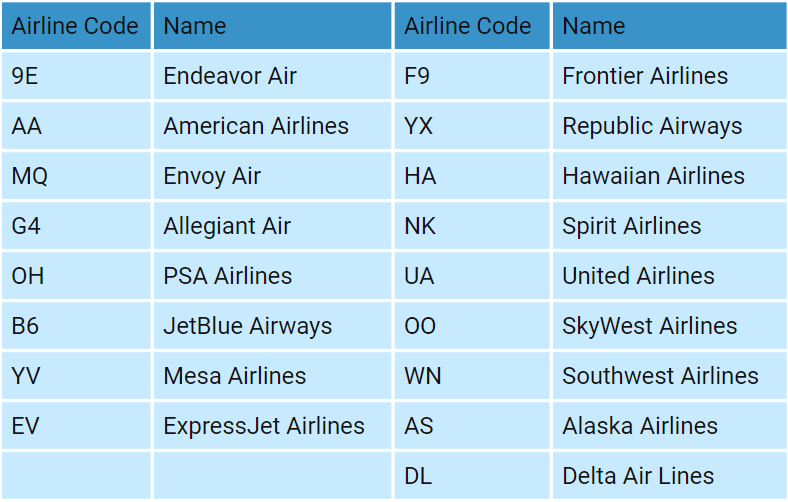

In [72]:
# Calculating the average delay time per airline
av_delay = pd.DataFrame(airlines.groupby('OP_UNIQUE_CARRIER')['FINAL_DELAY'].mean(), columns=['FINAL_DELAY'], index=only_airlines)
av_delay = av_delay.rename(columns={'FINAL_DELAY': 'Average delay'})
print("\nAverage delay time per airline:")
av_delay


Average delay time per airline:


,Average delay
9E,13.493331
AA,15.325990
MQ,17.108875
G4,14.383554
OH,12.524039
B6,30.900758
YV,19.539335
EV,27.361240
F9,19.294416
YX,12.379099


<BarContainer object of 17 artists>

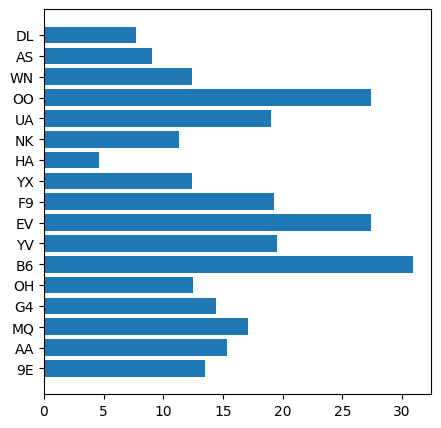

In [73]:
plt.figure(figsize=(5,5))
plt.barh(av_delay.index,av_delay['Average delay'])

In [79]:
# Group by origin and destination airport columns and count the occurrences
unique_routes = airlines.groupby(['ORIGIN', 'DEST']).size().reset_index(name='Counts')
filtered_routes = unique_routes[unique_routes['Counts'] >= 3000]
# Print the total number of unique routes
print(len(filtered_routes))

# Print all the unique routes with their counts
for index, row in filtered_routes.iterrows():
    print(f"Route: {row['ORIGIN']} -> {row['DEST']} | Occurrences: {row['Counts']}")

6
Route: JFK -> LAX | Occurrences: 3188
Route: LAX -> JFK | Occurrences: 3190
Route: LAX -> SFO | Occurrences: 3743
Route: LGA -> ORD | Occurrences: 3776
Route: ORD -> LGA | Occurrences: 3776
Route: SFO -> LAX | Occurrences: 3752


Hence the most occurences route is of LGA: LaGuardia Airport & ORD: O'Hare International Airport

In [80]:
#getting only specific columns
cols = ['ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER', 'FINAL_DELAY']
air_orig_dest = airlines[cols]

#setting origin and destination and filter
orig = 'LGA'
dest = 'ORD'
my_orig_dest = air_orig_dest[(air_orig_dest['ORIGIN'] == orig) & (air_orig_dest['DEST'] == dest)]

#computing the average delay on flights from SFO to LAX
my_orig_dest = my_orig_dest['FINAL_DELAY'].groupby([ airlines['ORIGIN'], airlines['DEST'],airlines['OP_UNIQUE_CARRIER']]).mean()

#printing results
print('Final delay time for each carrier:')
my_orig_dest

Final delay time for each carrier:


ORIGIN  DEST  OP_UNIQUE_CARRIER
LGA     ORD   AA                   20.276085
              DL                   68.573171
              NK                   47.140351
              OO                   58.068712
              UA                   35.483960
              YX                   36.284848
Name: FINAL_DELAY, dtype: float64

In [82]:
#set intervals
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']
airlines['INTERVAL'] = pd.cut(airlines['DEP_TIME'], limits, labels=names, right=True)
airlines

#getting only specific columns
cols = ['ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL']
my_orig_dest = airlines[cols]

#set origin and destination and filter
my_orig_dest = my_orig_dest[(my_orig_dest['ORIGIN'] == orig) & (my_orig_dest['DEST'] == dest)]

by_interval = my_orig_dest['FINAL_DELAY'].groupby([my_orig_dest['ORIGIN'], my_orig_dest['DEST'], my_orig_dest['OP_UNIQUE_CARRIER'], my_orig_dest['INTERVAL']]).mean()
by_interval = pd.DataFrame(by_interval)
print('Final delay time for each carrier grouped by period of the day:')
by_interval

Final delay time for each carrier grouped by period of the day:


FINAL_DELAY
ORIGIN DEST OP_UNIQUE_CARRIER INTERVAL                  
LGA    ORD  AA                early morning   485.500000
                              morning           3.162471
                              afternoon        22.567416
                              night            40.180556
            DL                early morning   827.000000
                              morning          29.674419
                              afternoon        61.313131
                              night           123.666667
            NK                early morning   337.000000
                              morning          28.443182
                              afternoon              NaN
                              night            42.092105
            OO                early morning   485.500000
                              morning          22.596774
                              afternoon        57.237237
                              night           119.352941
            UA                early morning    33.811321
                              morning           1.336788
                              afternoon        25.431151
                              night           120.282297
            YX                early morning   590.666667
                              morning          -2.720000
                              afternoon        31.676923
                              night            48.765957

In [85]:
#setting delayed
delay_limits =[-3000, -30, 30, 3000]
delay_names = ['early', 'on time', 'delayed']
airlines['DEP_DELAY_CATEGORIES'] = pd.cut(airlines['FINAL_DELAY'], delay_limits, labels=delay_names, right=False)

cols = ['ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL','DEP_DELAY_CATEGORIES']
my_orig_dest = airlines[cols]

#setting origin and destination and filter
my_orig_dest = my_orig_dest[(my_orig_dest['ORIGIN'] == orig) & (my_orig_dest['DEST'] == dest)]

my_orig_dest['COUNTER'] = 1
by_delays = my_orig_dest.pivot_table(['COUNTER'],index=['OP_UNIQUE_CARRIER','INTERVAL'], columns='DEP_DELAY_CATEGORIES', aggfunc='sum')
print('Number of advanced, on time, and delayed flights for each carrier')
by_delays

Number of advanced, on time, and delayed flights for each carrier


<ipython-input-85-dd10364f3506>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_orig_dest['COUNTER'] = 1


COUNTER                
DEP_DELAY_CATEGORIES              early on time delayed
OP_UNIQUE_CARRIER INTERVAL                             
AA                early morning       0       0       2
                  morning            71     299      67
                  afternoon          53     202     101
                  night              43     150      95
DL                early morning       0       0       1
                  morning             6      62      18
                  afternoon           1      62      36
                  night               5      21      34
NK                early morning       0       0       7
                  morning            10      62      16
                  afternoon           0       0       0
                  night              11      36      29
OO                early morning       0       0       2
                  morning            11     231      68
                  afternoon          18     169     146
                  night               4      70      96
UA                early morning       7      42       4
                  morning            83     272      31
                  afternoon          95     252      96
                  night              32      71     106
YX                early morning       0       0       3
                  morning            11      33       6
                  afternoon          15      29      21
                  night              12      16      19

<ipython-input-86-461b13abe542>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['COUNTER'] = 1


<Axes: ylabel='OP_UNIQUE_CARRIER'>

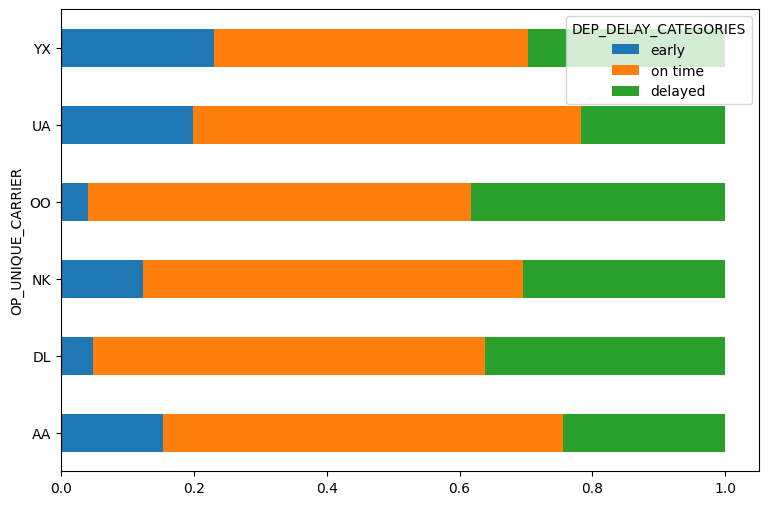

In [86]:
ref_data = airlines[cols]

ref_data = ref_data[(ref_data['ORIGIN'] == orig) & (ref_data['DEST'] == dest)]

#pivot table with all grouped info
ref_data['COUNTER'] = 1
ref_by_delays = ref_data.groupby([ ref_data.DEP_DELAY_CATEGORIES, ref_data.OP_UNIQUE_CARRIER])
ref_by_delays.size().unstack(0)

ex = ref_by_delays.COUNTER.sum().unstack(0)
normed_ex = ex.div(ex.sum(axis=1), axis=0)
normed_ex.plot(kind='barh', stacked=True,figsize=(9,6))

In [87]:
#Get data delayed flights
plot_data = airlines[cols]

cat = 'delayed' # 'early' | 'on time' | 'delayed'
plot_data = plot_data[(plot_data['ORIGIN'] == orig) & (plot_data['DEST'] == dest) & (plot_data['DEP_DELAY_CATEGORIES'] == cat)]

#pivot table
plot_data['COUNTER'] = 1
by_delays = plot_data.pivot_table(['COUNTER'],index=['OP_UNIQUE_CARRIER'], columns='INTERVAL', aggfunc='sum')
print('Delayed flights in each time interval of the day:')
by_delays

Delayed flights in each time interval of the day:


<ipython-input-87-8db52f6168aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['COUNTER'] = 1


COUNTER                        
INTERVAL          early morning morning afternoon night
OP_UNIQUE_CARRIER                                      
AA                            2      67       101    95
DL                            1      18        36    34
NK                            7      16         0    29
OO                            2      68       146    96
UA                            4      31        96   106
YX                            3       6        21    19

In [88]:
#Get reference data with all flys
ref_data = airlines[cols]

ref_data = ref_data[(ref_data['ORIGIN'] == orig) & (ref_data['DEST'] == dest)]

ref_data['COUNTER'] = 1
ref_by_delays = my_orig_dest.pivot_table(['COUNTER'],index=['OP_UNIQUE_CARRIER'], columns='INTERVAL',  aggfunc='sum')
print('Flights in each time interval of the day:')
ref_by_delays

Flights in each time interval of the day:


<ipython-input-88-06416e4e2b2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['COUNTER'] = 1


COUNTER                        
INTERVAL          early morning morning afternoon night
OP_UNIQUE_CARRIER                                      
AA                            2     438       357   288
DL                            1      87        99    60
NK                            7      88         0    76
OO                            2     311       335   170
UA                           53     386       444   209
YX                            3      50        67    47

In [89]:
#computing percentage of delayed flights per time interval
plot_percentage = by_delays/ref_by_delays * 100
plot_percentage.fillna(0, inplace=True)
plot_percentage

COUNTER                                 
INTERVAL          early morning    morning  afternoon      night
OP_UNIQUE_CARRIER                                               
AA                    100.00000  15.296804  28.291317  32.986111
DL                    100.00000  20.689655  36.363636  56.666667
NK                    100.00000  18.181818   0.000000  38.157895
OO                    100.00000  21.864952  43.582090  56.470588
UA                      7.54717   8.031088  21.621622  50.717703
YX                    100.00000  12.000000  31.343284  40.425532

<Axes: ylabel='OP_UNIQUE_CARRIER'>

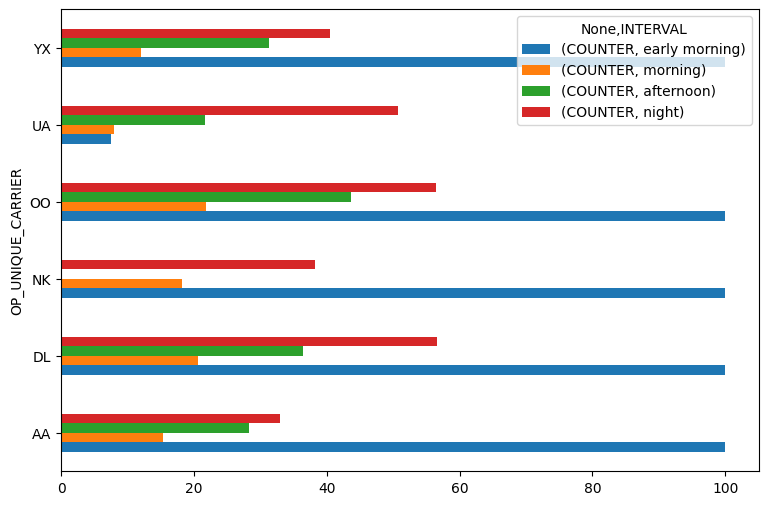

In [90]:
plot_percentage.plot(kind='barh', stacked=False,figsize=(9,6))

In [93]:
# carrier with the highest number of flights
data_test = airlines
data_test['COUNTER'] = 1
data_test = data_test.pivot_table(['COUNTER'], index=['OP_UNIQUE_CARRIER'], aggfunc='sum')
data_test

,COUNTER
OP_UNIQUE_CARRIER,
9E,60880
AA,228103
AS,61466
B6,72768
DL,225381
EV,37584
F9,28242
G4,24294
HA,19689


In [98]:
#select flights of this carrier
carrier = 'WN'
data_wn = airlines[airlines.OP_UNIQUE_CARRIER == carrier]

<Axes: ylabel='MONTH'>

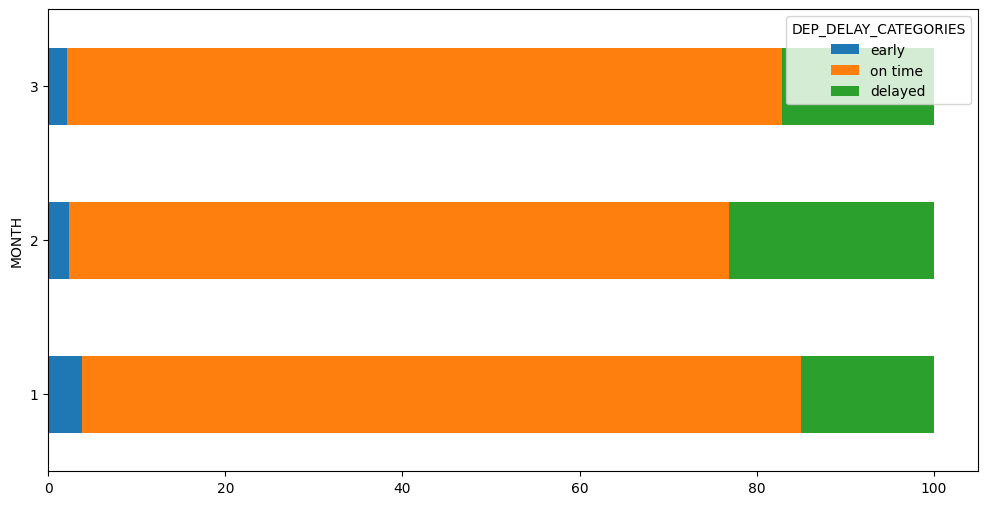

In [100]:
#  relation between month and delay
by_delays = data_wn.groupby([ data_wn.DEP_DELAY_CATEGORIES, data_wn.MONTH])
by_delays.size().unstack(0)

wn_ex = by_delays.COUNTER.sum().unstack(0)
wn_normed_ex = wn_ex.div(wn_ex.sum(axis=1), axis=0)
wn_normed_ex = wn_normed_ex * 100
wn_normed_ex.plot(kind='barh', stacked=True,figsize=(12,6))

In [101]:
cat = 'delayed'
data_wn = data_wn[(data_wn.DEP_DELAY_CATEGORIES == cat)]

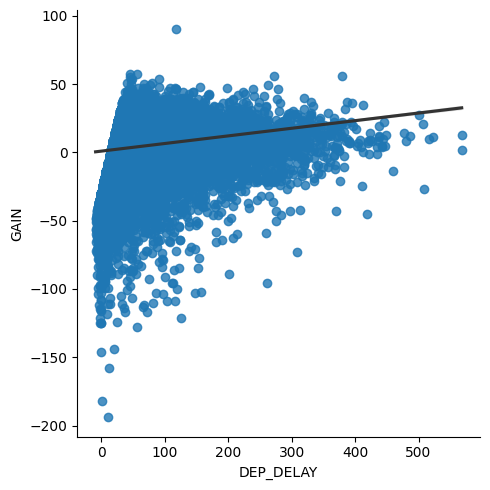

In [104]:
#  relation between departure delay and gain
sns.lmplot(x='DEP_DELAY', y='GAIN', data=data_wn, line_kws={'color':'.2'})

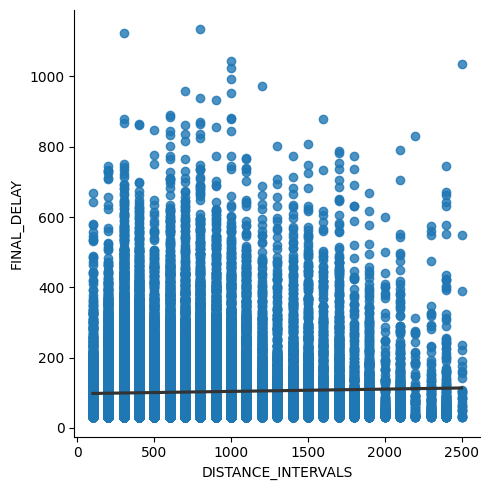

In [105]:
#  relation between distance and final_delay
sns.lmplot(x='DISTANCE_INTERVALS', y='FINAL_DELAY', data=data_wn, line_kws={'color':'.2'})

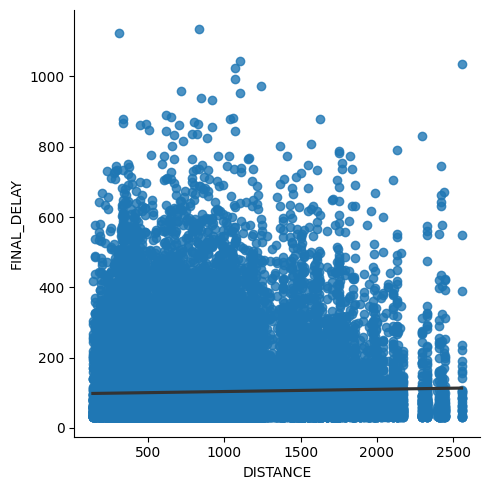

In [106]:
#  relation between distance and final_delay
sns.lmplot(x='DISTANCE', y='FINAL_DELAY', data=data_wn, line_kws={'color':'.2'})

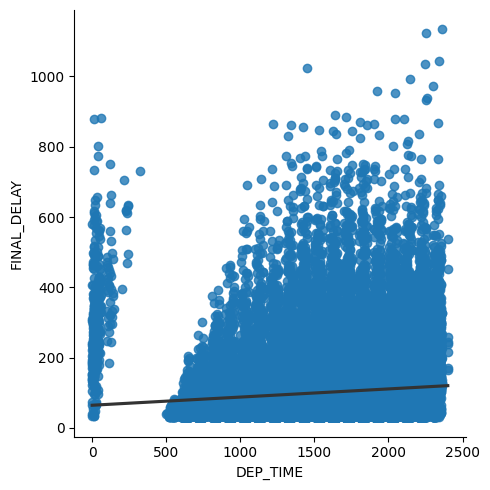

In [107]:
#  relation between dep_time of day and final_delay
sns.lmplot( x='DEP_TIME', y='FINAL_DELAY', data=data_wn, line_kws={'color':'.2'})

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [110]:
# WN data
x_cols=[ 'HOUR', 'ORIGIN', 'DEST', 'FL_DATE','DEP_TIME', 'DISTANCE_INTERVALS','DEP_DELAY','INTERVAL']
x = pd.get_dummies(data_wn[x_cols])
y = data_wn.FINAL_DELAY.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                random_state=1)

In [111]:
#Predict wn flights with linear regression
lr_wn_model = LinearRegression(fit_intercept=True)
lr_wn_model.fit(x_train,y_train)
y_result = lr_wn_model.predict(x_test)

(mean_squared_error(y_test, y_result), r2_score(y_test, y_result))


(199.2896198679819, 0.9772133297618049)

The model has a relatively low MSE, which indicates that it makes accurate predictions with low error. The R2 score is close to 1 (0.9772), which suggests that the model explains a significant amount of variance in the target variable. This R2 score of 0.9772 is very high and indicates that the model fits the data quite well.